Вариант 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def tridiagonal_solver(l, m, u, r):
    n = m.size
    a = np.zeros(n)
    b = np.zeros(n)

    a[0] = -u[0] / m[0]
    b[0] = r[0] / m[0]

    for i in range(1, n-1):
       a[i]=-u[i] / (l[i-1] * a[i-1] + m[i])
       b[i]=(r[i] - l[i-1] * b[i-1]) / (l[i-1] * a[i-1] + m[i])



    X = np.zeros(n)
    b[n - 1]= (r[n - 1] - l[n - 2] * b[n - 2])/(m[n - 1] + l[n - 2] * a[n - 2])
    X[n - 1] = b[n - 1]

    for i in range(n - 2, -1, -1):
        X[i] = a[i]*X[i+1] + b[i]
    return X

In [5]:
lx = 0
ly = 0
rx = 1
ry = 2
T = 10
tau = 0.002
N = 10

hx = (rx - lx) / N
hy = (ry - ly) / N
xs = np.linspace(lx, rx, N+1)
ys = np.linspace(ly, ry, N+1)
ts = np.linspace(0, T, int(T/tau) + 1)

u = np.zeros((int(T/tau) + 1, N + 1, N + 1))

In [6]:
for i in range(xs.size-2):
    for j in range(ys.size-2):
        u[0, i + 1, j + 1] = np.sin(np.pi * 2 * xs[i+1]) * np.sin(np.pi * ys[i+1])
        
# Переход c j а j + 1/2
for i in range(1, ts.size):
    uvsp = np.zeros((N + 1, N + 1))

    for iy in range(1, ys.size-1):
        
        ll = np.zeros(xs.size - 1)
        ll[-1] = 0
        
        mm = np.zeros(xs.size)
        mm[0]= 1
        mm[-1] = 1
        
        uu = np.zeros(xs.size - 1)
        uu[0] = 0
        
        bs = np.zeros(xs.size)
        bs[-1] = 0
        
        for j in range(xs.size - 2):
            ll[j] = tau / 2 / hx**2
            mm[j + 1] = (tau / hx**2 + 1)
            uu[j + 1] = tau / 2 / hx**2
            bs[j] = -(u[i - 1, j, iy] + tau / 2 / hx**2 * (u[i - 1, j, iy + 1] - 2 * u[i - 1, j, iy] + u[i - 1, j, iy - 1]))
        uvsp[iy] = tridiagonal_solver(ll, mm, uu, bs) 
    
    utmp = np.zeros((N + 1, N + 1))
    
    for ix in range(1 , xs.size - 1):
        ll = np.zeros(xs.size - 1)
        ll[-1] = 0
        
        mm = np.zeros(xs.size)
        mm[0]= 1
        mm[-1] = 1
        
        uu = np.zeros(xs.size - 1)
        uu[0] = 0
        
        bs = np.zeros(xs.size)
        bs[-1] = 0
        
        for j in range(xs.size - 2):
            ll[j] = tau / 2 / hy**2
            mm[j + 1] = (tau / hy**2 + 1)
            uu[j + 1] = tau / 2 / hy**2
            bs[j] = -(uvsp[ix, j] + tau / 2 / hy**2 * (uvsp[ix + 1, j] - 2 * uvsp[ix, j] + uvsp[ix - 1, j]))
        utmp[ix] = tridiagonal_solver(ll, mm, uu, bs)
        
    u[i] = utmp
    


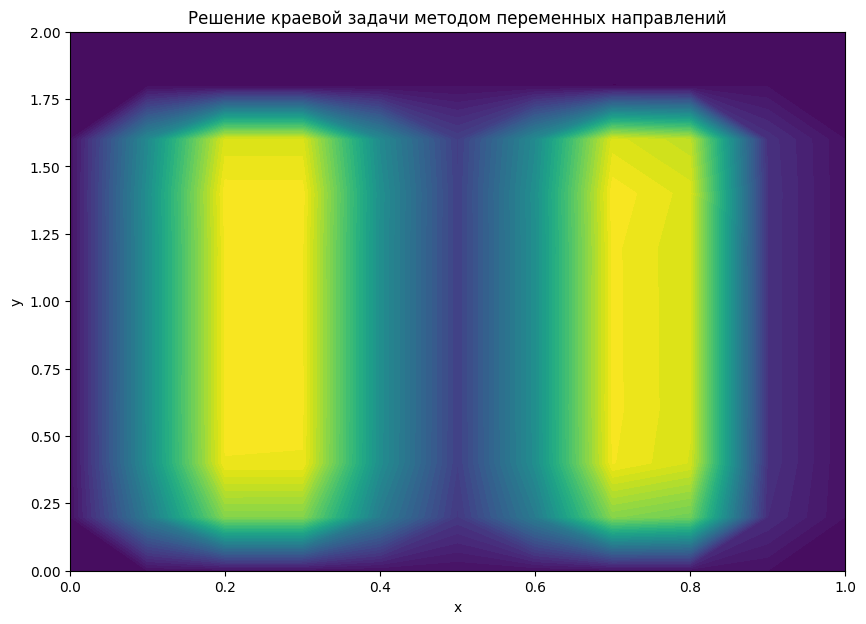

In [7]:

fig, ax = plt.subplots(figsize=(10, 7))

X, Y = np.meshgrid(xs, ys)
ax.set_title('Решение краевой задачи методом переменных направлений')
ax.set_xlabel('x')
ax.set_ylabel('y')
container = ax.contourf(X, Y, u[12].T, levels=50, cmap='viridis')

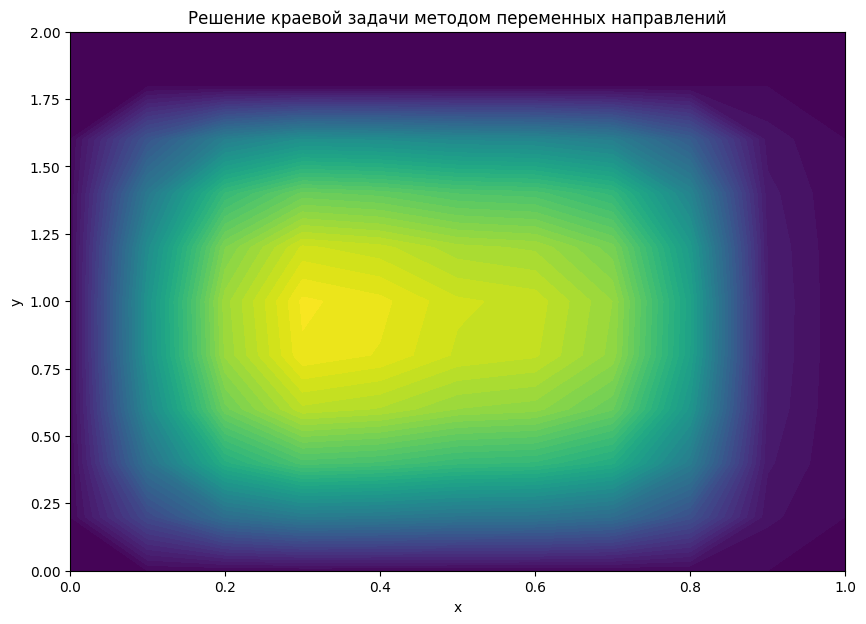

In [8]:

fig, ax = plt.subplots(figsize=(10, 7))

X, Y = np.meshgrid(xs, ys)
ax.set_title('Решение краевой задачи методом переменных направлений')
ax.set_xlabel('x')
ax.set_ylabel('y')
container = ax.contourf(X, Y, u[120].T, levels=50, cmap='viridis')

Error in callback <function _draw_all_if_interactive at 0x7f6481b9cf40> (for post_execute), with arguments args (),kwargs {}:


TypeError: 'QuadContourSet' object is not iterable

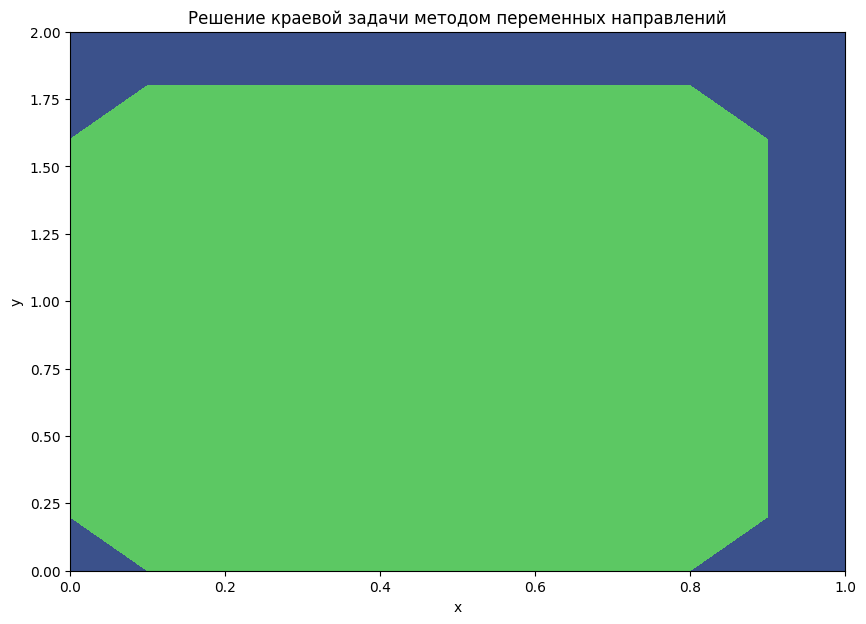

In [9]:
# Создание анимаций
from matplotlib import animation
fig, ax = plt.subplots(figsize=(10, 7))


X, Y = np.meshgrid(xs, ys)
ax.set_title('Решение краевой задачи методом переменных направлений')
ax.set_xlabel('x')
ax.set_ylabel('y')
container = ax.contourf(X, Y, u[12].T, levels=50, cmap='viridis')
container.set_label("frame = {}".format(0))
scl = 10
artists = [container]

for frame in range(ts.size//scl):
    container = ax.contourf(X, Y, u[frame * scl].T, levels=50, cmap='viridis')
    artists.append(container)
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)

